In [1]:
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
outpath='HAT-264-0000621.rlc.tfalc'
data=Table.read(outpath,format='ascii')
t=data['col2']
mag=data['col8']

Text(0.5, 0, 'time (BJD-2454833)')

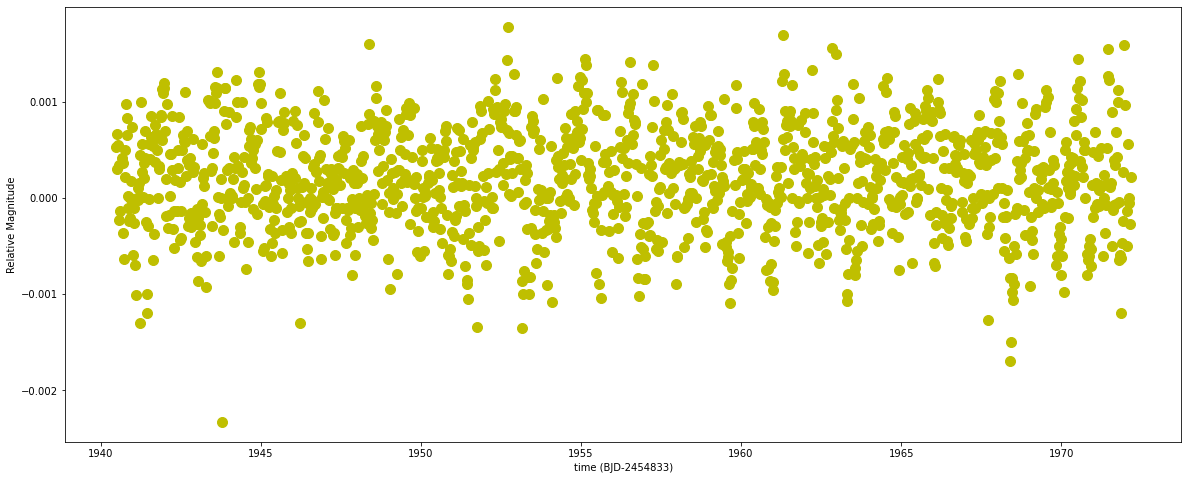

In [3]:
plt.figure(figsize=(20,8))
plt.plot(t,mag,'yo',markersize=10,label='HAT-264-0000621')
plt.ylabel('Relative Magnitude')
plt.xlabel('time (BJD-2454833)')

In [4]:
import astrobase
from astrobase import periodbase, checkplot
periodbase.use_astropy_bls()

[I 200817 13:52:08 __init__:84] An Astropy implementation of BLS is available because Astropy >= 3.1.
[I 200817 13:52:08 __init__:86] If you want to use it as the default periodbase BLS runner, call the periodbase.use_astropy_bls() function.


In [5]:
dates=data['col2']
fluxes=data['col8']
errs=fluxes*0.01

In [6]:
glsp = periodbase.pgen_lsp(dates,fluxes,errs)

[I 200817 13:52:11 zgls:597] using autofreq with 1580 frequency points, start P = 0.100, end P = 31.690
[I 200817 13:52:11 zgls:607] using 6 workers...


In [7]:
cp = checkplot.checkplot_png(glsp, dates, fluxes, errs)

[I 200817 13:52:16 nonphysical:216] spline fit done. nknots = 13,  chisq = 13237452.68851, reduced chisq = 9878.69604
[I 200817 13:52:16 png:696] plotting phased LC with period 0.915883, epoch 1961.54259
[I 200817 13:52:16 nonphysical:216] spline fit done. nknots = 13,  chisq = 13458228.19368, reduced chisq = 10043.45388
[I 200817 13:52:16 png:696] plotting phased LC with period 0.457942, epoch 1940.47757
[I 200817 13:52:16 nonphysical:216] spline fit done. nknots = 13,  chisq = 13196099.04234, reduced chisq = 9847.83511
[I 200817 13:52:16 png:696] plotting phased LC with period 1.831767, epoch 1940.47757
[I 200817 13:52:16 nonphysical:216] spline fit done. nknots = 13,  chisq = 13267605.50437, reduced chisq = 9901.19814
[I 200817 13:52:16 png:696] plotting phased LC with period 0.421404, epoch 1942.43900
[I 200817 13:52:16 nonphysical:216] spline fit done. nknots = 13,  chisq = 13277971.92813, reduced chisq = 9908.93427
[I 200817 13:52:16 png:696] plotting phased LC with period 0.2250

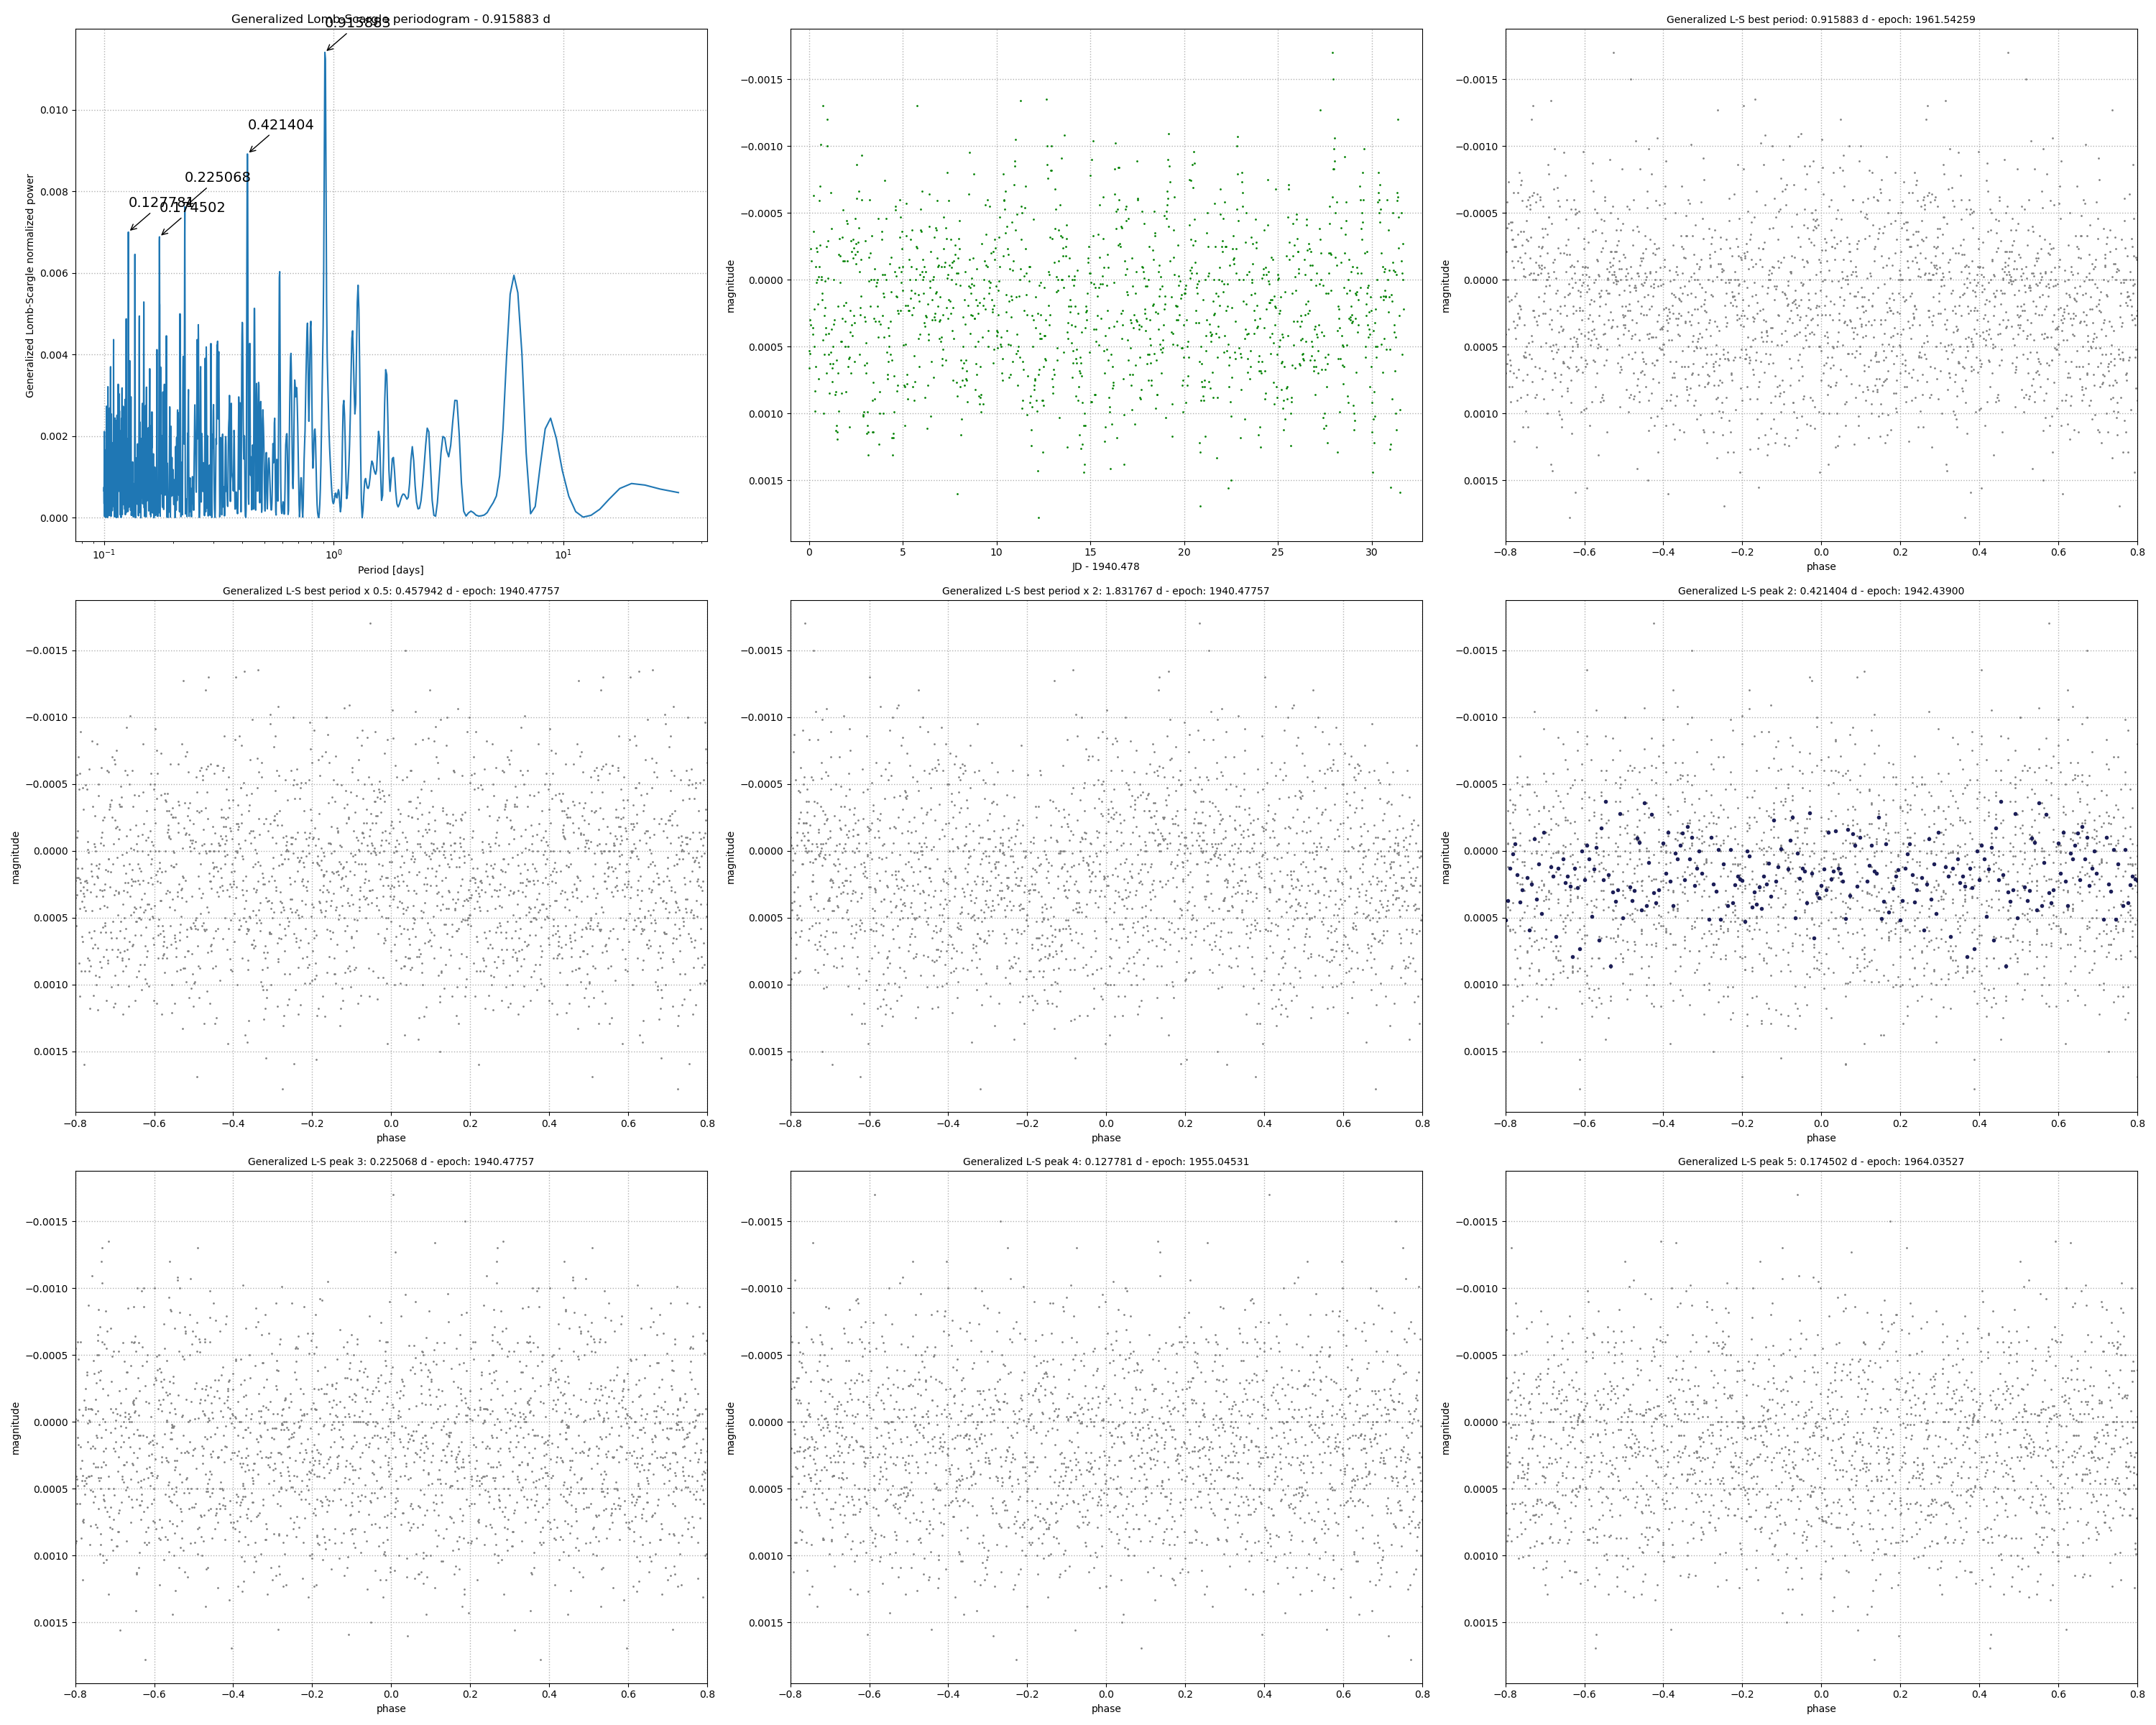

In [8]:
from IPython.display import Image
Image('0000621-checkplot-glsp.png')

In [9]:
glsp

{'bestperiod': 0.9158833653179166,
 'bestlspval': 0.011410451781435127,
 'nbestpeaks': 5,
 'nbestlspvals': [0.011410451781435127,
  0.008919565887517645,
  0.007622083370893254,
  0.007005256694686992,
  0.006888006014600899],
 'nbestperiods': [0.9158833653179166,
  0.42140378244680726,
  0.22506792926136304,
  0.1277805017741932,
  0.17450200682819333],
 'lspvals': array([0.00061794, 0.00070397, 0.00080246, ..., 0.00050068, 0.0007537 ,
        0.00066201]),
 'omegas': array([ 0.19827301,  0.23792761,  0.27758221, ..., 62.73358017,
        62.77323477, 62.81288937]),
 'periods': array([31.68956444, 26.40797037, 22.63540317, ...,  0.10015665,
         0.10009338,  0.10003019]),
 'method': 'gls',
 'kwargs': {'startp': None,
  'endp': None,
  'stepsize': 0.0001,
  'autofreq': True,
  'periodepsilon': 0.1,
  'nbestpeaks': 5,
  'sigclip': 10.0}}

In [10]:
print('LS algorithm:',(glsp['nbestperiods']),'(days)')

LS algorithm: [0.9158833653179166, 0.42140378244680726, 0.22506792926136304, 0.1277805017741932, 0.17450200682819333] (days)


In [11]:
bls=periodbase.bls_parallel_pfind(dates,fluxes,errs)

[I 200817 13:53:22 abls:919] min P: 0.1, max P: 100.0, nfreq: 126632, minfreq: 0.01, maxfreq: 10.0
[I 200817 13:53:22 abls:922] autofreq = True: using AUTOMATIC values for freq stepsize: 7.889032380780828e-05, ndurations: 100, min transit duration: 0.01, max transit duration: 0.4
[W 200817 13:53:22 abls:964] the requested max P = 100.000 is larger than the time base of the observations = 31.690,  will make minfreq = 2 x 1/timebase
[W 200817 13:53:22 abls:969] new minfreq: 0.06311225904624664, maxfreq: 10.0
[I 200817 13:53:22 abls:980] using 6 workers...
[I 200817 13:53:22 abls:1090] worker 1: minfreq = 0.063112, nfreqs = 21105
[I 200817 13:53:22 abls:1090] worker 2: minfreq = 1.728093, nfreqs = 21105
[I 200817 13:53:22 abls:1090] worker 3: minfreq = 3.393073, nfreqs = 21105
[I 200817 13:53:22 abls:1090] worker 4: minfreq = 5.058053, nfreqs = 21105
[I 200817 13:53:22 abls:1090] worker 5: minfreq = 6.723033, nfreqs = 21105
[I 200817 13:53:22 abls:1090] worker 6: minfreq = 8.388014, nfreq

In [12]:
cp = checkplot.checkplot_png(bls, dates, fluxes, errs)

[W 200817 13:53:36 png:1142] no best period found for this object, skipping...


In [13]:
spdm = periodbase.stellingwerf_pdm(dates,fluxes,errs)

[I 200817 13:53:41 spdm:337] using autofreq with 1580 frequency points, start P = 0.100, end P = 31.690
[I 200817 13:53:41 spdm:349] using 6 workers...


In [14]:
cp = checkplot.checkplot_png(spdm, dates, fluxes, errs)

[I 200817 13:53:47 nonphysical:216] spline fit done. nknots = 13,  chisq = 13272419.59474, reduced chisq = 9904.79074
[I 200817 13:53:47 png:696] plotting phased LC with period 5.111220, epoch 1940.47757
[I 200817 13:53:47 nonphysical:216] spline fit done. nknots = 13,  chisq = 13284833.22110, reduced chisq = 9914.05464
[I 200817 13:53:47 png:696] plotting phased LC with period 2.555610, epoch 1940.47757
[I 200817 13:53:47 nonphysical:216] spline fit done. nknots = 13,  chisq = 13307046.28558, reduced chisq = 9930.63156
[I 200817 13:53:47 png:696] plotting phased LC with period 10.222440, epoch 1970.73690
[I 200817 13:53:48 nonphysical:216] spline fit done. nknots = 13,  chisq = 13366463.75680, reduced chisq = 9974.97295
[I 200817 13:53:48 png:696] plotting phased LC with period 0.691912, epoch 1955.69913
[I 200817 13:53:48 nonphysical:216] spline fit done. nknots = 13,  chisq = 13292121.05309, reduced chisq = 9919.49332
[I 200817 13:53:48 png:696] plotting phased LC with period 1.5844

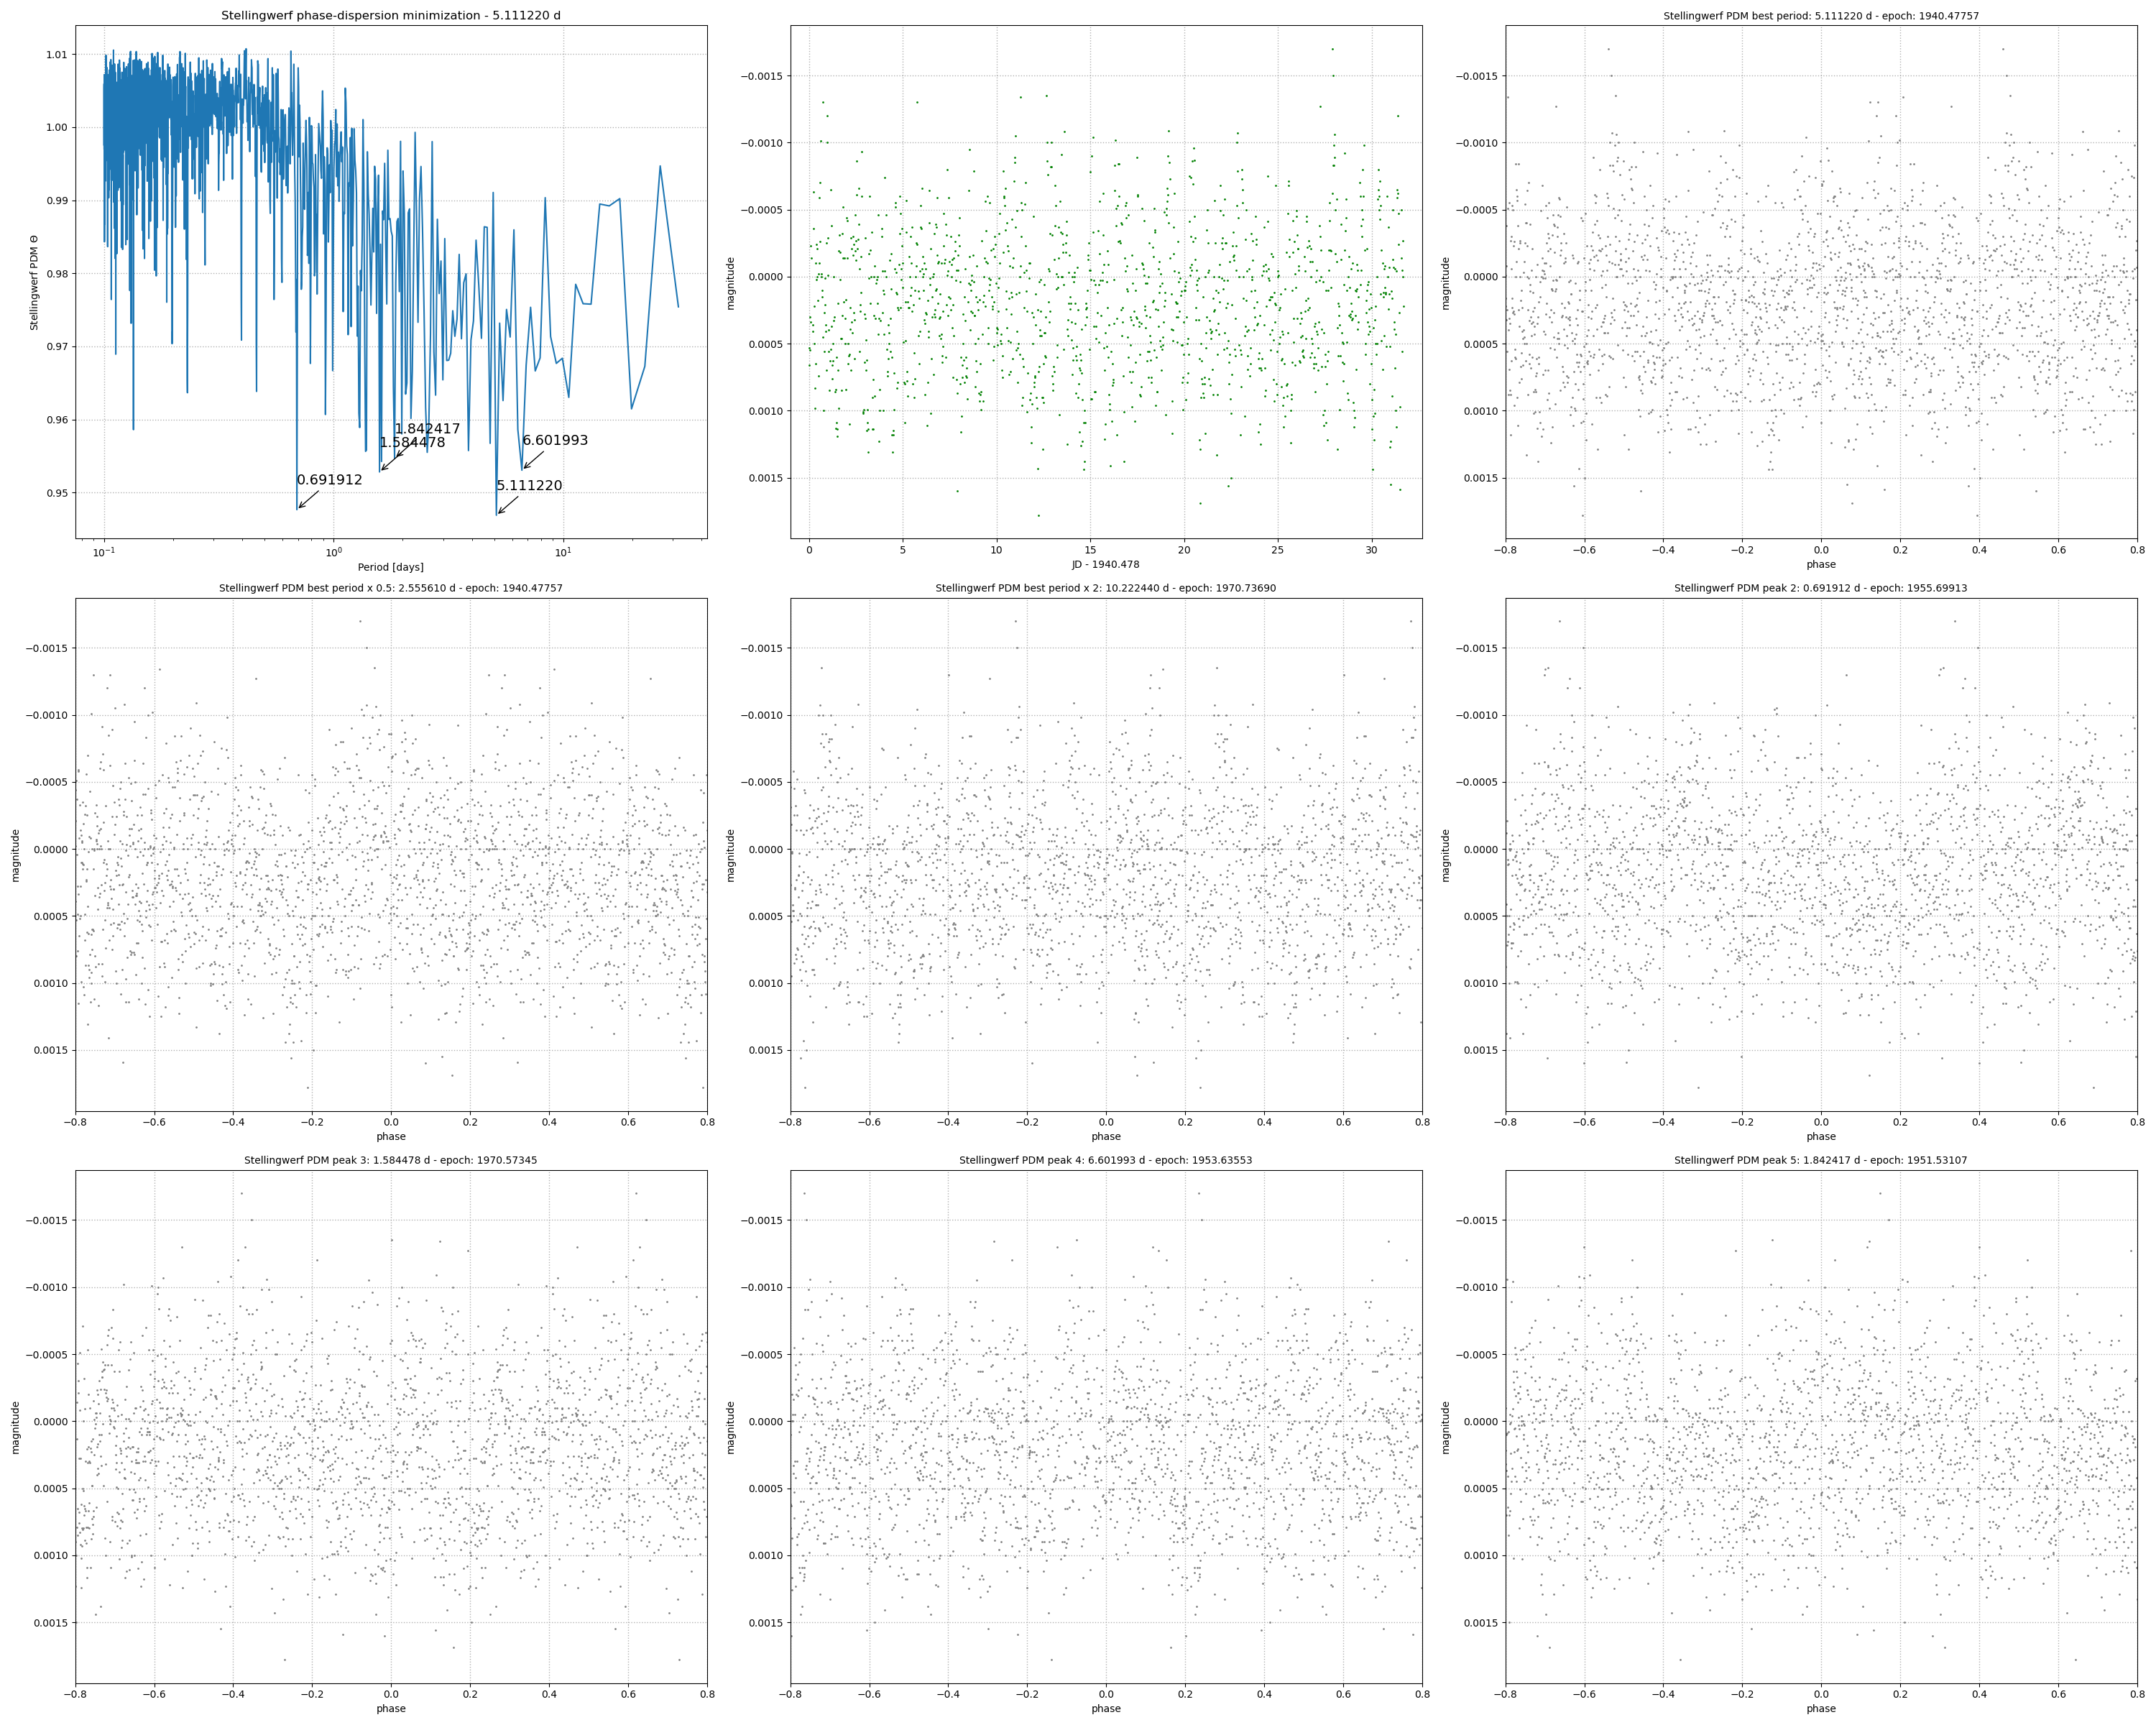

In [15]:
Image('0000621-checkplot-spdm.png')

In [16]:
print('PDM algorithm:',(spdm['nbestperiods']),'(days)')

PDM algorithm: [5.111220070967728, 0.6919118873362426, 1.5844782219999953, 6.601992591666648, 1.842416537209297] (days)
